## Assignment 2


### 1. Requirements

1. Implement a single neuron neural network, aka, the logistic regression unit. 
2. Use Log Loss Function, write code to carry out stochastic gradient descent for optimization, and then write a different activation function i.e., replace the sigmoid compression by ReLu or tan.Ideally, implement as a set of functions*.
3. Run it on any classification problem using a dataset from the internet (say the titanic dataset).
4. Provide accuracy and F1 score of the results. 
5. Please write code in Python in a Jupyter notebook.

#### 2. Imports

In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy
import seaborn as sns

#### 3. Data Ingestion

Dataset used on this project is originally from the National Institute of Diabetes and Digestive and Kidney Diseases. The objective is to predict based on diagnostic measurements whether a patient has diabetes.
https://www.kaggle.com/datasets/mathchi/diabetes-data-set 

In [44]:
#Import dataset
data= pd.read_csv("https://raw.githubusercontent.com/midhunmohank/Advanced-Data-Sciences-and-Architectures/main/diabetes.csv")

In [45]:
data.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


#### 4. Exploratory Data Analysis

1 : Glucose
2 : BMI
3 : DiabetesPedigreeFunction


<function matplotlib.pyplot.show(close=None, block=None)>

<Figure size 1440x1080 with 0 Axes>

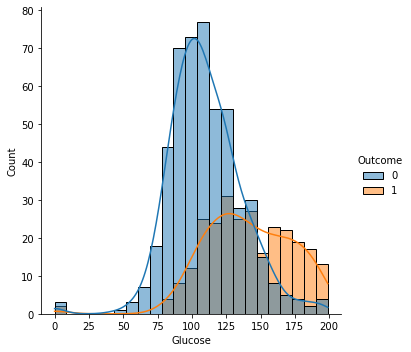

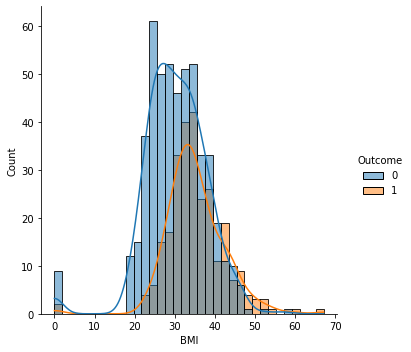

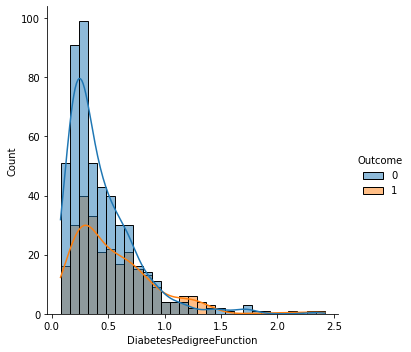

In [46]:
# displot 
features_listed = ['Glucose', 'BMI', 'DiabetesPedigreeFunction']
plt.figure(figsize = [20, 15])
counter = 0
for i in features_listed:
    counter += 1
    print(counter, ':', i)
    sns.displot(data = data, kde=True, x = data[str(i)], hue='Outcome')
plt.plot()
plt.show

In [47]:
# custom function for data vizualization
def look_at_distr_hist(*args, df_num=None, df_cat=None, class_feature="Outcome"):
    if df_num is not None:
        plt.figure(figsize = [20, 15])
        counter = 0
        for i in df_num.columns:
            counter += 1
            plt.subplot(3, 3, counter)
            sns.histplot(data = data, x = data[str(i)], hue = data[class_feature], multiple  = 'dodge')
        plt.plot()

    #look at the distribution for all categ variables
    if df_cat is not None:
        plt.figure(figsize = [20, 15])
        counter = 0
        for i in df_cat.columns:
            counter += 1
            plt.subplot(3, 3, counter)
            sns.histplot(data = data, x = data[str(i)], hue = data[class_feature], multiple  = 'dodge')
    plt.plot();

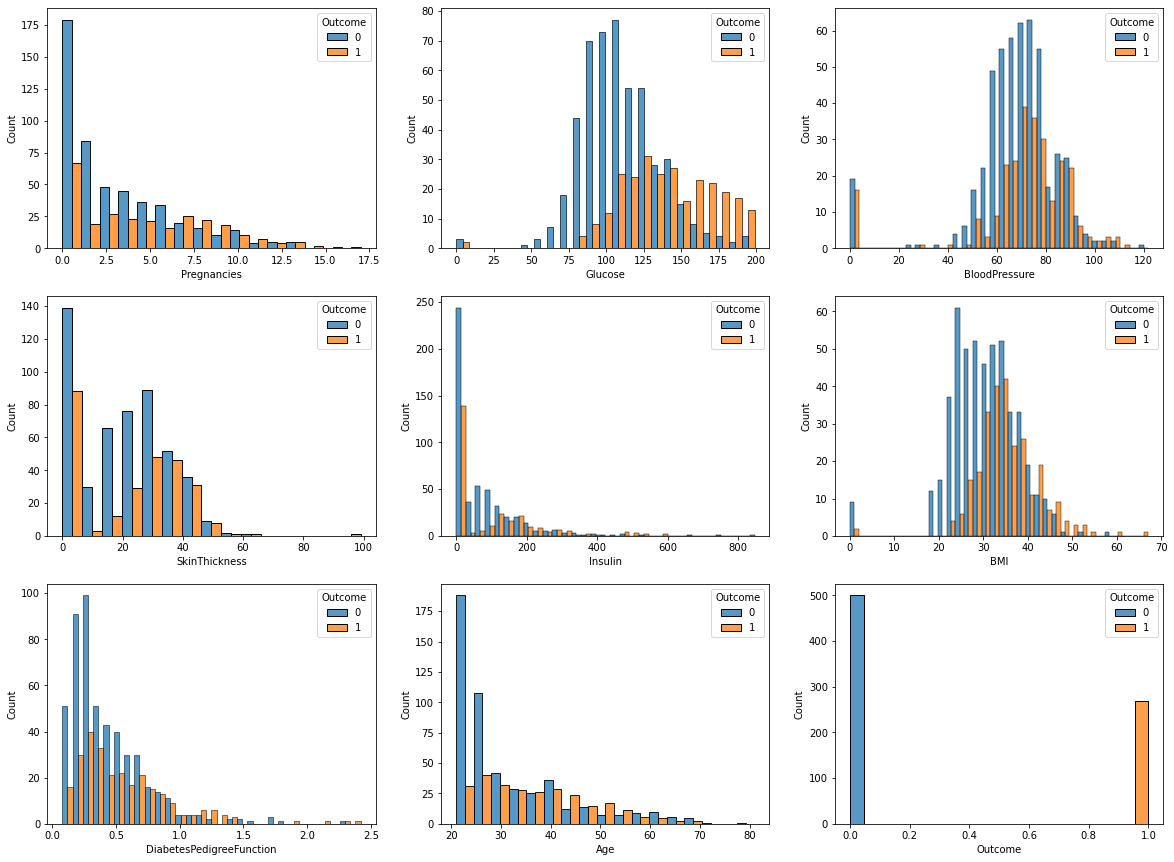

In [48]:
look_at_distr_hist(df_num=data, class_feature="Outcome")

#### 5. Data Preprocessing

In [49]:
#Train, test and validation spilt
from sklearn.model_selection import train_test_split

data_set_values=np.array(data)
number_of_rows,number_of_cols=data.shape
train, test = train_test_split(data_set_values, test_size = 0.4,random_state=57)
test, validate = train_test_split(test, test_size = 0.5,random_state=3)

In [50]:
#Spilt all sets into input and output sets
train_x=train[:,:number_of_cols-1]
train_y=train[:,[number_of_cols-1]]

test_x=test[:,:number_of_cols-1]
test_y=test[:,[number_of_cols-1]]

validate_x=validate[:,:number_of_cols-1]
validate_y=validate[:,[number_of_cols-1]]

#perform normalization on the input data set
input_data= np.vstack((train_x,test_x,validate_x))
mean_data = np.mean(input_data, axis=0)
std_data = np.std(input_data, axis=0)
train_x = (train_x - mean_data)/std_data
test_x = (test_x - mean_data)/std_data
validate_x = (validate_x - mean_data)/std_data

#### 6. Functions

##### 6.1 Activation Functions

In [51]:
def sigmoidFunction(X): 
    return 1/(1+np.exp(-X))

def tanh(x):
    t = (np.exp(x)-np.exp(-x))/(np.exp(x)+np.exp(-x))
    return 1-t**2


##### 6.2 Log Loss or Cross Entropy

In [52]:
def logLoss(m,Y,Z):
    return (-1/m)*np.sum((Y*np.log(Z))+(1-Y)*np.log(1-Z))

    # (-1/self.m)*np.sum((Y*np.log(Z))+(1-Y)*np.log(1-Z))

##### 6.3 Metrics

In [53]:
def Metrics(y_actual,y_hat):
    TP = 0 #True Positives
    FP = 0 # False Positives
    TN = 0 # True Negatives
    FN = 0 # False Negatives

    for i in range(len(y_hat)): 
        if y_actual[i]==y_hat[i]==1:
            TP += 1
        if y_hat[i]==1 and y_actual[i]!=y_hat[i]:
            FP += 1
        if y_actual[i]==y_hat[i]==0:
            TN += 1
        if y_hat[i]==0 and y_actual[i]!=y_hat[i]:
            FN += 1
    #Precision Score
    precision = TP / (FP + TP)
    #Recall Score
    recall = TP / (FN + TP)
    #Accuracy
    accuracy = ((TP + TN)/ (TP + FN + TN + FP)) * 100
    #F1 Score
    F1_Score = 2* precision * recall/ (precision + recall)
    print(f'Accuracy: {round(accuracy,2)}%')
    print(f'Precision:{round(precision,2)}')
    print(f'Recall Score:{round(recall,2)}')
    print(f'F1 Score:{round(F1_Score,2)}')

### 7. Single Neuron Logistic Regression Function with Stochatic Gradient Descent Applied Using Sigmoid Activation Function

In [54]:
#Logistic Regression - Model Definition
class logisticRegression:
    def __init__(self,total_iterations,learning_rate):
        self.learning_rate=learning_rate
        self.total_iterations=total_iterations
        self.bias=0.001


    def train(self,input,Y): 

        rows,cols=input.shape
        self.m=rows
        self.w=np.zeros((cols,1))
        costList=[]
        iterationList=[]
        for i in range(self.total_iterations+1):
            # y= x * w + b
            output=np.dot(input,self.w)+self.bias
            
            #Apply Sigmoid Activation function
            Z = sigmoidFunction(output)

            #calculating cost with Log Loss Method/CrossEntropy
            cost = logLoss(self.m,Y,Z)
            
            if i%1000==0:
                iterationList.append(i)
                costList.append(cost)
            
            #Gradient Descent
            dw=(1/self.m)*np.dot(input.T,np.subtract(Z,Y))
            db=(1/self.m)*np.sum(np.subtract(Z,Y))
            
            #updating weights and bais (Learning Part)
            self.w = self.w-self.learning_rate*dw
            self.bias = self.bias - self.learning_rate*db
        print(cost)
        plt.plot(iterationList, costList)
        plt.title("Cost Relation")
        plt.xlabel("Iterations")
        plt.ylabel("Cost")
        plt.show()
        return 

    #Prediction function
    def predict(self,input):
        output=np.dot(input,self.w)+self.bias
        Z=sigmoidFunction(output)
        # if output more than 0.5 then yes else no. (Binary Classification)
        prediction=[]
        for i in Z:
            if i>=0.5:
                prediction.append(1)
            else:
                prediction.append(0)
        return prediction


##### 7.1. Fitting and Training the Model with Data

In [55]:
model_wtSigmoid=logisticRegression(total_iterations=10000,learning_rate=0.001)

0.5104087820477667


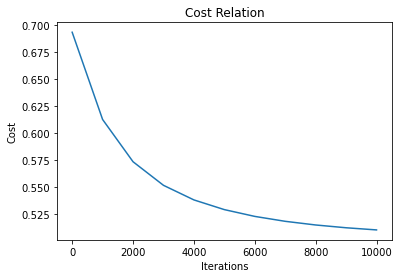

In [56]:
model_wtSigmoid.train(train_x,train_y)

##### 7.2 Predicting from the trained model

In [57]:
test_predictionSigmoid = model_wtSigmoid.predict(test_x)

##### 7.3 Metrics

In [58]:
Metrics(test_y,test_predictionSigmoid)

Accuracy: 81.17%
Precision:0.75
Recall Score:0.71
F1 Score:0.73


### 8. Single Neuron Logistic Regression Function with Stochatic Gradient Descent Applied Using Tanh Activation Function

In [59]:
#Logistic Regression - Model Definition
class logisticRegression:
    def __init__(self,total_iterations,learning_rate):
        self.learning_rate=learning_rate
        self.total_iterations=total_iterations
        self.bias=0.001


    def train(self,input,Y): 

        rows,cols=input.shape
        self.m=rows
        self.w=np.zeros((cols,1))
        costList=[]
        iterationList=[]
        for i in range(self.total_iterations+1):
            # y= x * w + b
            output=np.dot(input,self.w)+self.bias
            
            #Apply tanh Activation function
            Z = tanh(output)

            #calculating cost with Log Loss Method/CrossEntropy
            cost = logLoss(self.m,Y,Z)
            
            if i%1000==0:
                iterationList.append(i)
                costList.append(cost)
            
            #Gradient Descent
            dw=(1/self.m)*np.dot(input.T,np.subtract(Z,Y))
            db=(1/self.m)*np.sum(np.subtract(Z,Y))
            
            #updating weights and bais (Learning Part)
            self.w = self.w-self.learning_rate*dw
            self.bias = self.bias - self.learning_rate*db
        print(cost)
        plt.plot(iterationList, costList)
        plt.title("Cost Relation")
        plt.xlabel("Iterations")
        plt.ylabel("Cost")
        plt.show()
        return 

    #Prediction function
    def predict(self,input):
        output=np.dot(input,self.w)+self.bias
        Z=tanh(output)
        # if output more than 0.5 then yes else no. (Binary Classification)
        prediction=[]
        for i in Z:
            if i>=0.5:
                prediction.append(1)
            else:
                prediction.append(0)
        return prediction

##### 8.1. Fitting and Training the Model with Data

In [60]:
model_wtTanh=logisticRegression(total_iterations=10000,learning_rate=0.001)

0.5237017303758794


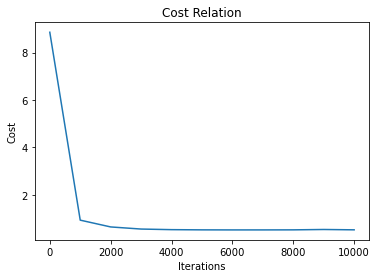

In [61]:
model_wtTanh.train(train_x,train_y)

##### 8.2 Predicting from the trained model

In [62]:
test_predictionTanh = model_wtTanh.predict(test_x)

##### 8.3 Metrics

In [63]:
Metrics(test_y,test_predictionTanh)

Accuracy: 81.82%
Precision:0.78
Recall Score:0.69
F1 Score:0.73
